In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB


In [85]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target


In [86]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000        

In [88]:
notnull_sum = df.notnull().sum()
print("Number of duplicate rows:", notnull_sum)

Number of duplicate rows: sepal length (cm)    150
sepal width (cm)     150
petal length (cm)    150
petal width (cm)     150
target               150
dtype: int64


In [89]:

duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)



Number of duplicate rows: 1


In [71]:
df = df.drop_duplicates()

target
0    50
1    50
2    49
Name: count, dtype: int64
target
0    33.557047
1    33.557047
2    32.885906
Name: proportion, dtype: float64


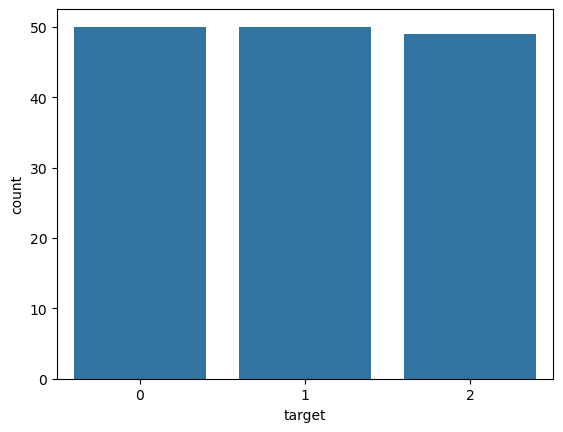

In [84]:
# Check distribution of target classes
print(df['target'].value_counts())

# Check percentage distribution
print(df['target'].value_counts(normalize=True) * 100)

# If using matplotlib / seaborn to visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.show()


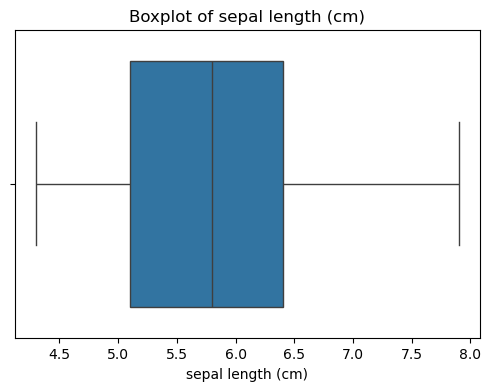

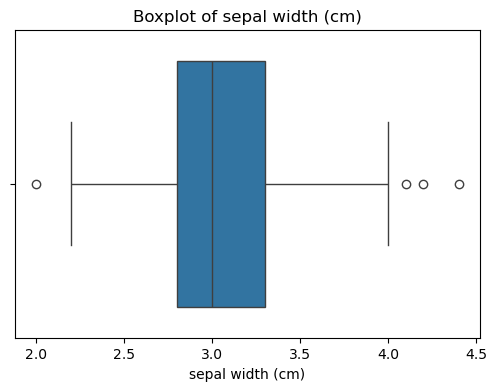

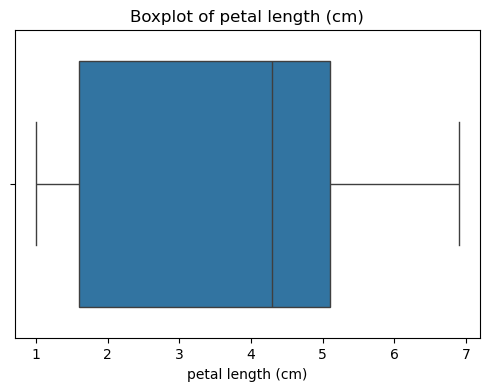

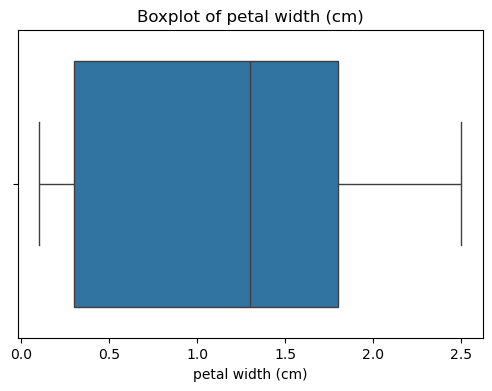

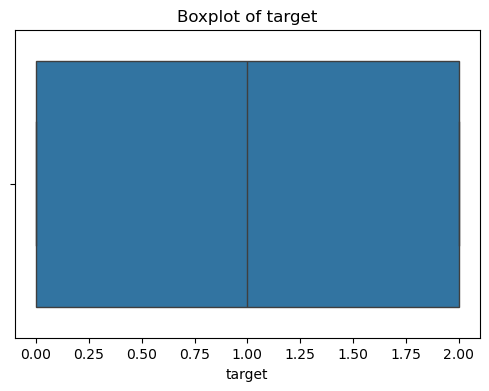

In [83]:
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [27]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outliers_iqr = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
print("Number of outliers (IQR):", outliers_iqr.sum())

Number of outliers (IQR): 4


In [28]:
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [72]:
X = df.drop(["target"], axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [73]:
param_grid = {
        "criterion": ["gini", "entropy","log_loss"],
        "splitter": ["best"],
        "max_depth": [ 2, 3, 4, 5],
        "min_samples_split": [2, 5],
        "min_samples_leaf": [1, 2],
        "max_features": [None, "sqrt"],
    }

dt = DecisionTreeClassifier(random_state=41,class_weight='balanced')
grid = GridSearchCV(
        dt,
        param_grid=param_grid,
        scoring="accuracy",
        cv=5,
        n_jobs=1,
        refit=True,
        return_train_score=False,
    )
grid.fit(X_train, y_train)
best_dt = grid.best_estimator_

y_pred_dt = best_dt.predict(X_test)
dt_acc = accuracy_score(y_test, y_pred_dt)
print("Best hyperparameters:", grid.best_params_)
print("Test accuracy:", round(dt_acc, 4))
print("\nClassification Report (Decision Tree):\n")
print(classification_report(y_test, y_pred_dt))


Best hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Test accuracy: 0.9667

Classification Report (Decision Tree):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [80]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    max_features=None,
    min_samples_leaf=1,
    min_samples_split=2,
    splitter='best',
    class_weight='balanced',
    random_state=41
)


In [81]:
clf.fit(X_train, y_train)

# 4. Predict
y_pred = clf.predict(X_test)

# 5. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


### Deliverables:

## 1. Data Preprocessing

Missing values: None found.

Duplicates: 1 duplicate row detected → removed (improved evaluation).

Outliers: 4 outliers detected → kept, since removing them lowered accuracy.

Final dataset: clean, balanced, and ready for modeling.



## 2. Train-Test Split

Features (X) = all numerical features.

Target (y) = flower species (Setosa, Versicolor, Virginica).

Split: 80% training, 20% testing.

Stratified split to preserve class balance.

## 3. Decision Tree Hyperparameter Tuning

Method: GridSearchCV with 5-fold cross-validation.

Parameters tested:

criterion: gini, entropy, log_loss

max_depth: 2–5

min_samples_split: 2, 5

min_samples_leaf: 1, 2

max_features: None, sqrt

splitter: best

class_weight: balanced

## 4. Best Model

Best hyperparameters:
{'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

 Test Accuracy: 96.7%

## 5. Classification Report 
### Class	 :          Precision	Recall	F1-score
### Setosa (0) :   	1.00	1.00	1.00
### Versicolor (1) :	1.00	0.90	0.95
### Virginica (2)	:   0.91	1.00	0.95